In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

WORK_DIR = '/content/drive/My Drive/datasets'
DATA_DIR = os.path.join(WORK_DIR, 'olist')

# Loading the Data

In [3]:
df_abt = pd.read_csv(os.path.join(DATA_DIR, 'propensao_revenda_abt.csv'))
df_abt.head()

,data_ref_safra,seller_id,uf,tot_orders_12m,tot_items_12m,tot_items_dist_12m,receita_12m,recencia,nao_revendeu_next_6m
0,2018-01-01,0015a82c2db000af6aaaf3ae2ecb0532,SP,3,3,1,2685.00,74,1
1,2018-01-01,001cca7ae9ae17fb1caed9dfb1094831,ES,171,207,9,21275.23,2,0
2,2018-01-01,002100f778ceb8431b7a1020ff7ab48f,SP,38,42,15,781.80,2,0
3,2018-01-01,003554e2dce176b5555353e4f3555ac8,GO,1,1,1,120.00,16,1
4,2018-01-01,004c9cd9d87a3c30c522c48c4fc07416,SP,130,141,75,16228.88,8,0


In [4]:
df_train = df_abt.query('data_ref_safra < "2018-03-01"')

df_oot = df_abt.query('data_ref_safra == "2018-03-01"')

# Identificar as varáveis para modelagem

In [5]:
key_vars = ['data_ref_safra', 'seller_id']
num_vars = ['tot_orders_12m', 'tot_items_12m', 'tot_items_dist_12m', 'receita_12m', 'recencia']
cat_vars = ['uf']
target = 'nao_revendeu_next_6m'
features = cat_vars + num_vars

# Dados de treinamento somente com as variáveis numéricas
X_train = df_train[num_vars]
y_train = df_train[target]

# Dados de avaliação (out of time) somente com as variáveis numéricas
X_oot = df_oot[num_vars]
y_oot = df_oot[target]

In [6]:
print(X_train.shape, y_train.shape)

(3495, 5) (3495,)


In [7]:
print(X_oot.shape, y_oot.shape)

(1874, 5) (1874,)


# Treinando uma DecisionTree

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# Aplicando as métricas de classificação

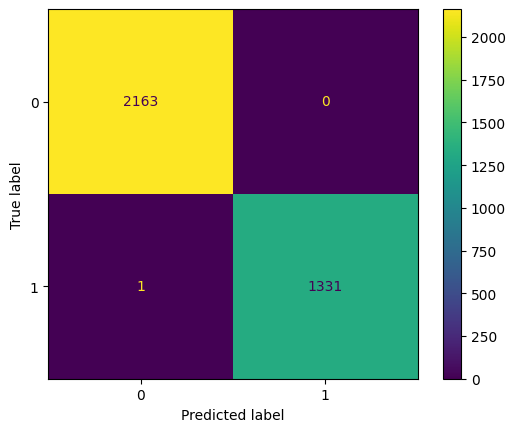

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(dt_model, X_train, y_train, values_format='d');

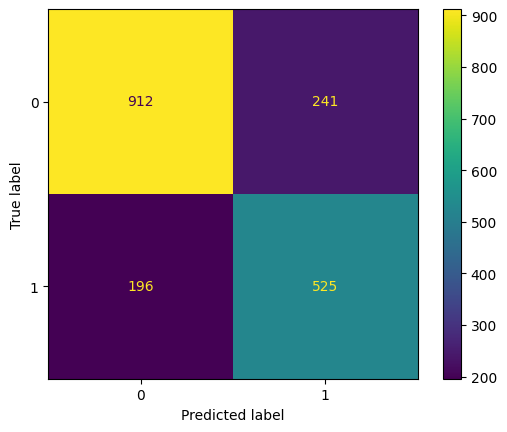

In [10]:
ConfusionMatrixDisplay.from_estimator(dt_model, X_oot, y_oot, values_format='d');

In [11]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(f"Acurácia (Treino): {accuracy_score(y_train, dt_model.predict(X_train))}")
print(f"Acurácia (OOT/Teste): {accuracy_score(y_oot, dt_model.predict(X_oot))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, dt_model.predict(X_train))}")
print(f"Acurácia Balanceada (OOT/Teste): {balanced_accuracy_score(y_oot, dt_model.predict(X_oot))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, dt_model.predict(X_train))}")
print(f"Precision (OOT/Teste): {precision_score(y_oot, dt_model.predict(X_oot))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, dt_model.predict(X_train))}")
print(f"Recall (OOT/Teste): {recall_score(y_oot, dt_model.predict(X_oot))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, dt_model.predict(X_train))}")
print(f"F1-Score (OOT/Teste): {f1_score(y_oot, dt_model.predict(X_oot))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, dt_model.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (OOT/Teste): {roc_auc_score(y_oot, dt_model.predict_proba(X_oot)[:,1])}")

Acurácia (Treino): 0.9997138769670959
Acurácia (OOT/Teste): 0.7668089647812166
Acurácia Balanceada (Treino): 0.9996246246246246
Acurácia Balanceada (OOT/Teste): 0.7595676959219932
Precision (Treino): 1.0
Precision (OOT/Teste): 0.685378590078329
Recall (Treino): 0.9992492492492493
Recall (OOT/Teste): 0.7281553398058253
F1-Score (Treino): 0.9996244836650394
F1-Score (OOT/Teste): 0.7061197041022192
ROCAUC (Treino): 0.9999998264561372
ROCAUC (OOT/Teste): 0.7595676959219932


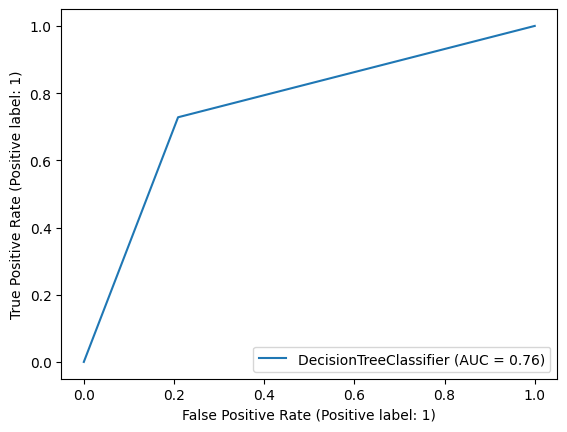

In [12]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(dt_model, X_oot, y_oot);

In [13]:
metricas = {
    'model': ['DecisionTree', 'DecisionTree'],
    'modo': ['treino', 'oot'],
    'accuracy': [accuracy_score(y_train, dt_model.predict(X_train)), accuracy_score(y_oot, dt_model.predict(X_oot))],
    'balanced_accuracy': [balanced_accuracy_score(y_train, dt_model.predict(X_train)), balanced_accuracy_score(y_oot, dt_model.predict(X_oot))],
    'precision': [precision_score(y_train, dt_model.predict(X_train)), precision_score(y_oot, dt_model.predict(X_oot))],
    'recall': [recall_score(y_train, dt_model.predict(X_train)), recall_score(y_oot, dt_model.predict(X_oot))],
    'f1_score': [f1_score(y_train, dt_model.predict(X_train)), f1_score(y_oot, dt_model.predict(X_oot))],
    'rocauc': [roc_auc_score(y_train, dt_model.predict_proba(X_train)[:,1]), roc_auc_score(y_oot, dt_model.predict_proba(X_oot)[:,1])]

}

pd.DataFrame(metricas)

,model,modo,accuracy,balanced_accuracy,precision,recall,f1_score,rocauc
0,DecisionTree,treino,0.999714,0.999625,1.000000,0.999249,0.999624,1.000000
1,DecisionTree,oot,0.766809,0.759568,0.685379,0.728155,0.706120,0.759568


Realizando o plot da Roc Curve para ambos os conjuntos de dados (treino e teste)

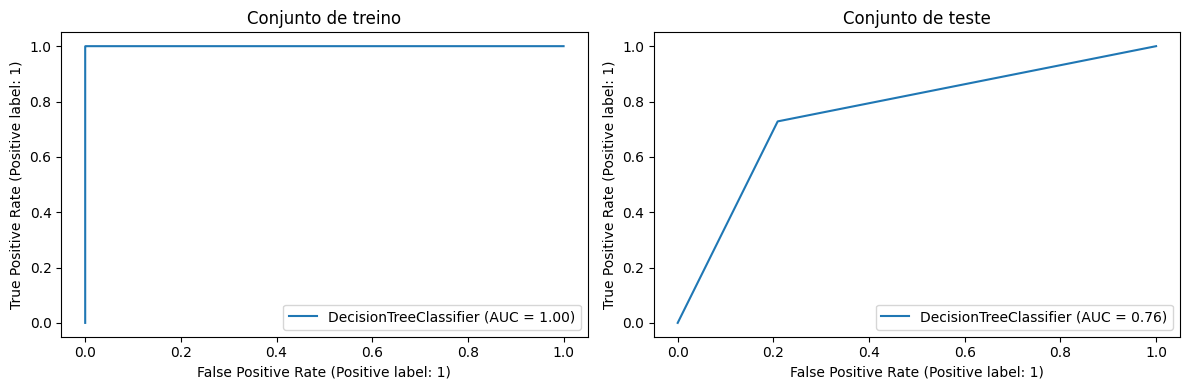

In [14]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].set_title('Conjunto de treino')
RocCurveDisplay.from_estimator(dt_model, X_train, y_train, ax=axes[0]);

axes[1].set_title('Conjunto de teste')
RocCurveDisplay.from_estimator(dt_model, X_oot, y_oot, ax=axes[1]);

plt.tight_layout()